In [1]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [4]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(lr=1e-4),
    metrics=['accuracy']
)

In [7]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


In [9]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch = 100,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 5,
)

Epoch 1/10
100/100 [==============================] - 19s 187ms/step - loss: 0.6989 - accuracy: 0.5315 - val_loss: 0.7026 - val_accuracy: 0.4000
Epoch 2/10
100/100 [==============================] - 18s 183ms/step - loss: 0.6895 - accuracy: 0.5223 - val_loss: 0.6784 - val_accuracy: 0.5400
Epoch 3/10
100/100 [==============================] - 18s 182ms/step - loss: 0.6703 - accuracy: 0.5843 - val_loss: 0.6311 - val_accuracy: 0.6600
Epoch 4/10
100/100 [==============================] - 18s 183ms/step - loss: 0.6595 - accuracy: 0.5953 - val_loss: 0.6260 - val_accuracy: 0.7100
Epoch 5/10
100/100 [==============================] - 18s 184ms/step - loss: 0.6480 - accuracy: 0.6184 - val_loss: 0.6295 - val_accuracy: 0.6700
Epoch 6/10
100/100 [==============================] - 18s 183ms/step - loss: 0.6286 - accuracy: 0.6403 - val_loss: 0.6779 - val_accuracy: 0.5900
Epoch 7/10
100/100 [==============================] - 18s 183ms/step - loss: 0.6030 - accuracy: 0.6737 - val_loss: 0.6890 - val_ac

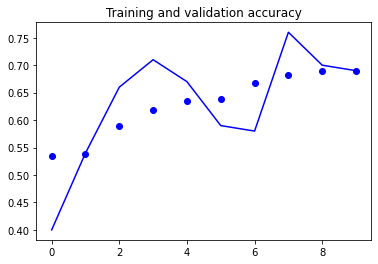

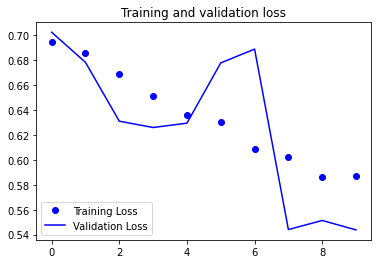

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()